In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Concatenate, Dropout, BatchNormalization

# Load feature files
eeg_data = pd.read_excel("C:/Users/bibek/Downloads/PROJECT2/EEGrefined.xlsx")
digital_data = pd.read_excel("C:/Users/bibek/Downloads/PROJECT2/digitfile_refined.xlsx")
thermal_data = pd.read_excel("C:/Users/bibek/Downloads/PROJECT2/thermalrefined.xlsx")

# Encode emotion labels
label_encoder = LabelEncoder()
eeg_data.iloc[:, 0] = label_encoder.fit_transform(eeg_data.iloc[:, 0])
digital_data.iloc[:, 0] = label_encoder.transform(digital_data.iloc[:, 0])
thermal_data.iloc[:, 0] = label_encoder.transform(thermal_data.iloc[:, 0])

# Extract features and labels
y = eeg_data.iloc[:, 0].values  # Emotion labels
X_eeg = eeg_data.iloc[:, 1:].values  # EEG features
X_digital = digital_data.iloc[:, 1:].values  # Digital image features
X_thermal = thermal_data.iloc[:, 1:].values  # Thermal features

# Normalize features
scaler = StandardScaler()
X_eeg = scaler.fit_transform(X_eeg)
X_digital = scaler.fit_transform(X_digital)
X_thermal = scaler.fit_transform(X_thermal)

# Train-test split
X_train_eeg, X_test_eeg, X_train_digital, X_test_digital, X_train_thermal, X_test_thermal, y_train, y_test = train_test_split(
    X_eeg, X_digital, X_thermal, y, test_size=0.2, random_state=42)

# EEG Input
eeg_input = Input(shape=(X_train_eeg.shape[1],), name="EEG_Input")
x1 = Dense(64, activation="relu")(eeg_input)
x1 = BatchNormalization()(x1)
x1 = Dropout(0.3)(x1)

# Digital Image Input
digital_input = Input(shape=(X_train_digital.shape[1],), name="Digital_Input")
x2 = Dense(64, activation="relu")(digital_input)
x2 = BatchNormalization()(x2)
x2 = Dropout(0.3)(x2)

# Thermal Image Input
thermal_input = Input(shape=(X_train_thermal.shape[1],), name="Thermal_Input")
x3 = Dense(64, activation="relu")(thermal_input)
x3 = BatchNormalization()(x3)
x3 = Dropout(0.3)(x3)

# Fusion Layer
merged = Concatenate()([x1, x2, x3])
merged = Dense(128, activation="relu")(merged)
merged = BatchNormalization()(merged)
merged = Dropout(0.4)(merged)

# Output Layer
output = Dense(6, activation="softmax")(merged)

# Create Model
model = Model(inputs=[eeg_input, digital_input, thermal_input], outputs=output)
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

# Train Model
history = model.fit(
    [X_train_eeg, X_train_digital, X_train_thermal], y_train,
    validation_data=([X_test_eeg, X_test_digital, X_test_thermal], y_test),
    epochs=50, batch_size=16, verbose=1)

# Evaluate Model
test_loss, test_accuracy = model.evaluate([X_test_eeg, X_test_digital, X_test_thermal], y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")

# Predictions
y_pred = model.predict([X_test_eeg, X_test_digital, X_test_thermal])
y_pred_classes = np.argmax(y_pred, axis=1)

# Classification Report
print(classification_report(y_test, y_pred_classes, target_names=label_encoder.classes_))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Save Model
model.save("multimodal_emotion_model.h5")

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type int).

Epoch 1/50


C:\Users\bibek\anaconda3\Lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['keras_tensor_14', 'keras_tensor_15', 'keras_tensor_16']. Received: the structure of inputs=('*', '*', '*')
  warnings.warn(


15/15 ━━━━━━━━━━━━━━━━━━━━ 10s 68ms/step - accuracy: 0.2577 - loss: 1.6942 - val_accuracy: 0.3333 - val_loss: 1.2988
Epoch 2/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.3492 - loss: 1.2896 - val_accuracy: 0.4333 - val_loss: 1.0749
Epoch 3/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.4632 - loss: 1.0674 - val_accuracy: 0.5333 - val_loss: 0.9167
Epoch 4/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6172 - loss: 0.9120 - val_accuracy: 0.6167 - val_loss: 0.7886
Epoch 5/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6532 - loss: 0.7811 - val_accuracy: 0.7167 - val_loss: 0.6162
Epoch 6/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7528 - loss: 0.6240 - val_accuracy: 0.7333 - val_loss: 0.5573
Epoch 7/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7581 - loss: 0.4997 - val_accuracy: 0.7667 - val_loss: 0.4649
Epoch 8/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7458 - loss: 0.4631 - val_accuracy: 0.9167 - val_loss: 0

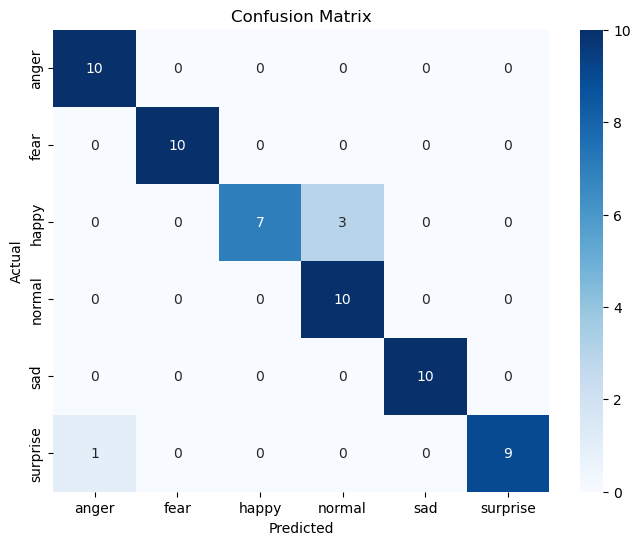

              precision    recall  f1-score   support

       anger       0.91      1.00      0.95        10
        fear       1.00      1.00      1.00        10
       happy       1.00      0.70      0.82        10
      normal       0.77      1.00      0.87        10
         sad       1.00      1.00      1.00        10
    surprise       1.00      0.90      0.95        10

    accuracy                           0.93        60
   macro avg       0.95      0.93      0.93        60
weighted avg       0.95      0.93      0.93        60



In [3]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Concatenate, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# 1️⃣ Load Extracted Features from Excel Files
path_thermal = "C:\\Users\\bibek\\Downloads\\PROJECT2\\thermalrefined.xlsx"
path_digital = "C:\\Users\\bibek\\Downloads\\PROJECT2\\digitfile_refined.xlsx"
path_eeg = "C:\\Users\\bibek\\Downloads\\PROJECT2\\EEGrefined.xlsx"

df_thermal = pd.read_excel(path_thermal)
df_digital = pd.read_excel(path_digital)
df_eeg = pd.read_excel(path_eeg)

# 2️⃣ Separate Labels and Features
y_labels = df_eeg.iloc[:, 0]  # Assuming first column is the emotion label

X_thermal = df_thermal.iloc[:, 1:].values  # Excluding label column
X_digital = df_digital.iloc[:, 1:].values  # Excluding label column
X_eeg = df_eeg.iloc[:, 1:].values  # Excluding label column

# 3️⃣ Encode Labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y_labels)  # Convert emotions to numbers (0-5)

# 4️⃣ Convert Data to Correct Data Type (Fixing ValueError)
X_thermal = np.array(X_thermal, dtype=np.float32)
X_digital = np.array(X_digital, dtype=np.float32)
X_eeg = np.array(X_eeg, dtype=np.float32)
y = np.array(y, dtype=np.int32)

# 5️⃣ Normalize Features
scaler = StandardScaler()
X_thermal = scaler.fit_transform(X_thermal)
X_digital = scaler.fit_transform(X_digital)
X_eeg = scaler.fit_transform(X_eeg)

# 6️⃣ Train-Test Split
X_train_eeg, X_test_eeg, X_train_digital, X_test_digital, X_train_thermal, X_test_thermal, y_train, y_test = train_test_split(
    X_eeg, X_digital, X_thermal, y, test_size=0.2, random_state=42, stratify=y
)

# 7️⃣ Define Deep Learning Model (Hybrid)
input_eeg = Input(shape=(X_train_eeg.shape[1],))
input_digital = Input(shape=(X_train_digital.shape[1],))
input_thermal = Input(shape=(X_train_thermal.shape[1],))

# EEG Feature Extractor
x1 = Dense(128, activation="relu")(input_eeg)
x1 = Dropout(0.3)(x1)
x1 = Dense(64, activation="relu")(x1)

# Digital Feature Extractor
x2 = Dense(128, activation="relu")(input_digital)
x2 = Dropout(0.3)(x2)
x2 = Dense(64, activation="relu")(x2)

# Thermal Feature Extractor
x3 = Dense(128, activation="relu")(input_thermal)
x3 = Dropout(0.3)(x3)
x3 = Dense(64, activation="relu")(x3)

# Fusion Layer
merged = Concatenate()([x1, x2, x3])
merged = Dense(128, activation="relu")(merged)
merged = Dropout(0.4)(merged)
merged = Dense(64, activation="relu")(merged)

# Output Layer
output = Dense(6, activation="softmax")(merged)  # 6 emotions classification

# Create Model
model = Model(inputs=[input_eeg, input_digital, input_thermal], outputs=output)
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

# 8️⃣ Train Model
history = model.fit(
    [X_train_eeg, X_train_digital, X_train_thermal], y_train,
    validation_data=([X_test_eeg, X_test_digital, X_test_thermal], y_test),
    epochs=50, batch_size=16, verbose=1
)

# 9️⃣ Evaluate Model
test_loss, test_accuracy = model.evaluate([X_test_eeg, X_test_digital, X_test_thermal], y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# 🔟 Confusion Matrix
y_pred = np.argmax(model.predict([X_test_eeg, X_test_digital, X_test_thermal]), axis=1)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# 🔹 Classification Report
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))


In [8]:
# Save model as a single file
model.save("C:\\Users\\bibek\\Downloads\\PROJECT2\\emotion_model.h5")
print("Model saved as HDF5 file!")

# Load the model later
loaded_model_h5 = keras.models.load_model("C:\\Users\\bibek\\Downloads\\PROJECT2\\emotion_model.h5")
loaded_model_h5.summary()


Model saved as HDF5 file!


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)      │ (None, 42)                │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ input_layer_1 (InputLayer)    │ (None, 42)                │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ input_layer_2 (InputLayer)    │ (None, 42)                │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_5 (Dense)               │ (None, 128)               │           5,504 │ input_layer[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_7 (Dense)               │ (None, 128)               │           5,504 │ input_layer_1[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_9 (Dense)               │ (None, 128)               │           5,504 │ input_layer_2[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout_4 (Dropout)           │ (None, 128)               │               0 │ dense_5[0][0]              │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout_5 (Dropout)           │ (None, 128)               │               0 │ dense_7[0][0]              │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout_6 (Dropout)           │ (None, 128)               │               0 │ dense_9[0][0]              │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_6 (Dense)               │ (None, 64)                │           8,256 │ dropout_4[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_8 (Dense)               │ (None, 64)                │           8,256 │ dropout_5[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_10 (Dense)              │ (None, 64)                │           8,256 │ dropout_6[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ concatenate_1 (Concatenate)   │ (None, 192)               │               0 │ dense_6[0][0],             │
│                               │                           │                 │ dense_8[0][0],             │
│                               │                           │                 │ dense_10[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_11 (Dense)              │ (None, 128)               │          24,704 │ concatenate_1[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout_7 (Dropout)           │ (None, 128)               │               0 │ dense_11[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_12 (Dense)              │ (None, 64)                │           8,256 │ dropout_7[0][0]            │
├───────────────────────────────┼───────────────────────────┼───────────────

 Total params: 74,632 (291.54 KB)

 Trainable params: 74,630 (291.52 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

Epoch 1/50


C:\Users\bibek\anaconda3\Lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['keras_tensor', 'keras_tensor_1', 'keras_tensor_2']. Received: the structure of inputs=('*', '*', '*')
  warnings.warn(


30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.2912 - loss: 1.6009 - val_accuracy: 0.4167 - val_loss: 1.0727
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5198 - loss: 0.9755 - val_accuracy: 0.6500 - val_loss: 0.7782
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7161 - loss: 0.7320 - val_accuracy: 0.9333 - val_loss: 0.4633
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7626 - loss: 0.5822 - val_accuracy: 0.8833 - val_loss: 0.3681
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8165 - loss: 0.4427 - val_accuracy: 0.8333 - val_loss: 0.3898
Epoch 6/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8550 - loss: 0.4067 - val_accuracy: 0.8500 - val_loss: 0.3078
Epoch 7/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8509 - loss: 0.3742 - val_accuracy: 0.9000 - val_loss: 0.2368
Epoch 8/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9253 - loss: 0.2397 - val_accuracy: 0.9167 - val_loss: 0.2229
Ep

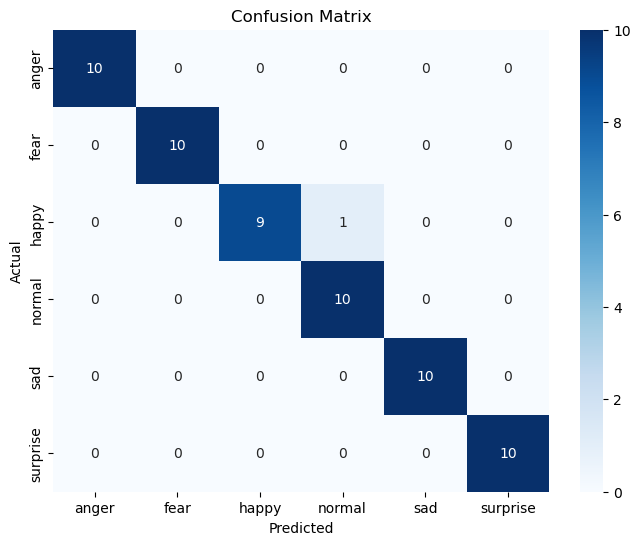

              precision    recall  f1-score   support

       anger       1.00      1.00      1.00        10
        fear       1.00      1.00      1.00        10
       happy       1.00      0.90      0.95        10
      normal       0.91      1.00      0.95        10
         sad       1.00      1.00      1.00        10
    surprise       1.00      1.00      1.00        10

    accuracy                           0.98        60
   macro avg       0.98      0.98      0.98        60
weighted avg       0.98      0.98      0.98        60



In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Concatenate, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# 1️⃣ Load Extracted Features from Excel Files
path_thermal = "C:\\Users\\bibek\\Downloads\\PROJECT2\\thermalrefined.xlsx"
path_digital = "C:\\Users\\bibek\\Downloads\\PROJECT2\\digitfile_refined.xlsx"
path_eeg = "C:\\Users\\bibek\\Downloads\\PROJECT2\\EEGrefined.xlsx"

df_thermal = pd.read_excel(path_thermal)
df_digital = pd.read_excel(path_digital)
df_eeg = pd.read_excel(path_eeg)

# 2️⃣ Separate Labels and Features
y_labels = df_eeg.iloc[:, 0]  # Assuming first column is the emotion label

X_thermal = df_thermal.iloc[:, 1:].values  # Excluding label column
X_digital = df_digital.iloc[:, 1:].values  # Excluding label column
X_eeg = df_eeg.iloc[:, 1:].values  # Excluding label column

# 3️⃣ Encode Labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y_labels)  # Convert emotions to numbers (0-5)

# 4️⃣ Convert Data to Correct Data Type
X_thermal = np.array(X_thermal, dtype=np.float32)
X_digital = np.array(X_digital, dtype=np.float32)
X_eeg = np.array(X_eeg, dtype=np.float32)
y = np.array(y, dtype=np.int32)

# 5️⃣ Normalize Features
scaler = StandardScaler()
X_thermal = scaler.fit_transform(X_thermal)
X_digital = scaler.fit_transform(X_digital)
X_eeg = scaler.fit_transform(X_eeg)

# 6️⃣ Train-Test Split
X_train_eeg, X_test_eeg, X_train_digital, X_test_digital, X_train_thermal, X_test_thermal, y_train, y_test = train_test_split(
    X_eeg, X_digital, X_thermal, y, test_size=0.2, random_state=42, stratify=y
)

# 7️⃣ Data Augmentation (Feature-Level)
def augment_features(X, noise_level=0.01):
    noise = np.random.normal(0, noise_level, X.shape)  # Add Gaussian noise
    scale_factor = np.random.uniform(0.9, 1.1, size=(X.shape[0], 1))  # Random scaling
    return X * scale_factor + noise

# Apply Augmentation to Training Data
X_train_eeg_aug = augment_features(X_train_eeg)
X_train_digital_aug = augment_features(X_train_digital)
X_train_thermal_aug = augment_features(X_train_thermal)

# Combine Original and Augmented Data
X_train_eeg = np.vstack((X_train_eeg, X_train_eeg_aug))
X_train_digital = np.vstack((X_train_digital, X_train_digital_aug))
X_train_thermal = np.vstack((X_train_thermal, X_train_thermal_aug))
y_train = np.hstack((y_train, y_train))  # Duplicate labels for augmentation

# 8️⃣ Define Deep Learning Model (Hybrid)
input_eeg = Input(shape=(X_train_eeg.shape[1],))
input_digital = Input(shape=(X_train_digital.shape[1],))
input_thermal = Input(shape=(X_train_thermal.shape[1],))

# EEG Feature Extractor
x1 = Dense(128, activation="relu")(input_eeg)
x1 = Dropout(0.3)(x1)
x1 = Dense(64, activation="relu")(x1)

# Digital Feature Extractor
x2 = Dense(128, activation="relu")(input_digital)
x2 = Dropout(0.3)(x2)
x2 = Dense(64, activation="relu")(x2)

# Thermal Feature Extractor
x3 = Dense(128, activation="relu")(input_thermal)
x3 = Dropout(0.3)(x3)
x3 = Dense(64, activation="relu")(x3)

# Fusion Layer
merged = Concatenate()([x1, x2, x3])
merged = Dense(128, activation="relu")(merged)
merged = Dropout(0.4)(merged)
merged = Dense(64, activation="relu")(merged)

# Output Layer
output = Dense(6, activation="softmax")(merged)  # 6 emotions classification

# Create Model
model = Model(inputs=[input_eeg, input_digital, input_thermal], outputs=output)
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

# 9️⃣ Train Model
history = model.fit(
    [X_train_eeg, X_train_digital, X_train_thermal], y_train,
    validation_data=([X_test_eeg, X_test_digital, X_test_thermal], y_test),
    epochs=50, batch_size=16, verbose=1
)

# 🔟 Evaluate Model
test_loss, test_accuracy = model.evaluate([X_test_eeg, X_test_digital, X_test_thermal], y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# 🔹 Confusion Matrix
y_pred = np.argmax(model.predict([X_test_eeg, X_test_digital, X_test_thermal]), axis=1)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# 🔹 Classification Report
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))


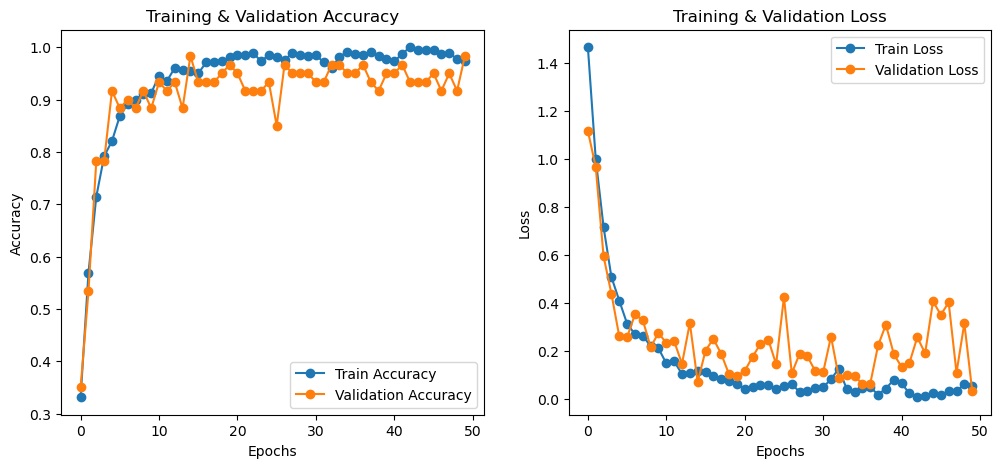

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step  


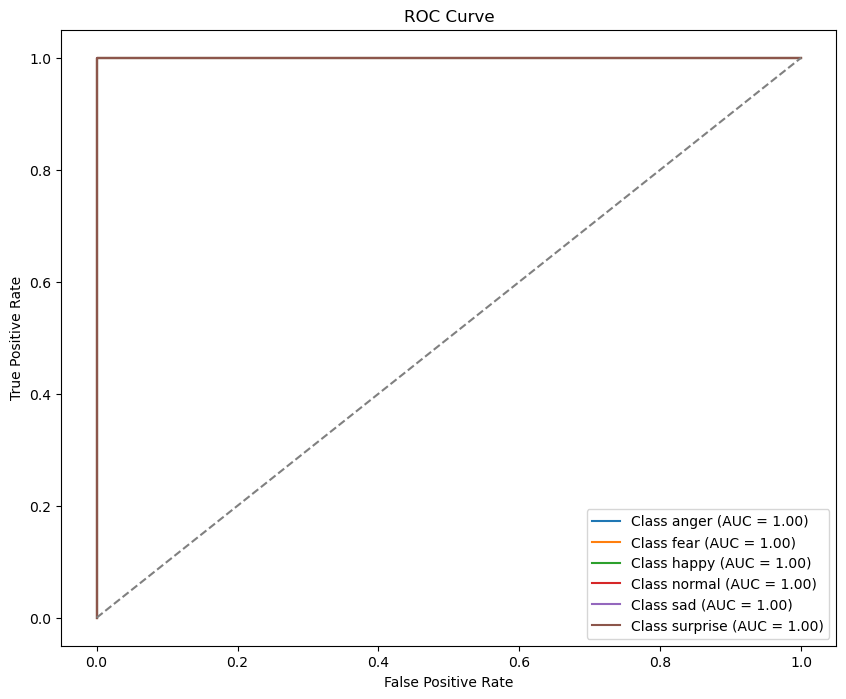

In [5]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# 🔹 Training & Validation Accuracy & Loss Graphs
plt.figure(figsize=(12, 5))

# Training & Validation Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title("Training & Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

# Training & Validation Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
plt.title("Training & Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.show()

# 🔹 ROC Curve for Multiclass Classification
y_prob = model.predict([X_test_eeg, X_test_digital, X_test_thermal])  # Get predicted probabilities
y_test_bin = tf.keras.utils.to_categorical(y_test, num_classes=6)  # One-hot encode labels

plt.figure(figsize=(10, 8))

for i in range(6):  
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_prob[:, i])  # Compute FPR & TPR
    roc_auc = auc(fpr, tpr)  # Compute AUC Score
    plt.plot(fpr, tpr, label=f"Class {label_encoder.classes_[i]} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], linestyle="--", color="gray")  # Random classifier line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()
